In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
## LOADING THE DATASET

In [3]:
df = pd.read_csv('finalTrain.csv')

In [4]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
5,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,02-04-2022,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20
6,0x3aab,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,01-03-2022,14:55,15:10,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33
7,0x689b,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,16-03-2022,20:30,20:40,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40
8,0x6f67,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20-03-2022,20:40,20:50,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41
9,0xc9cf,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,15-02-2022,21:15,21:30,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15


In [5]:
df.shape

(45584, 20)

In [8]:
## DROPING THE 'ID' COLUMN

In [6]:
df.drop(['ID'],axis=1,inplace=True)

In [9]:
## CONVERTING 'ORDER DATE' TO DATETIME FORMAT

In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [11]:
df['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [12]:
## SEPERATING YEAR, MONTH AND DATE FROM 'ORDER_DATE'

In [13]:
df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day

In [14]:
df.head(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14
5,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-02-04,20:25,20:35,...,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,2022,2,4
6,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,2022-01-03,14:55,15:10,...,1,Meal,scooter,1.0,No,Metropolitian,33,2022,1,3
7,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,2022-03-16,20:30,20:40,...,2,Snack,motorcycle,1.0,No,Metropolitian,40,2022,3,16
8,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,2022-03-20,20:40,20:50,...,0,Snack,motorcycle,NaN,No,Metropolitian,41,2022,3,20
9,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,2022-02-15,21:15,21:30,...,0,Meal,motorcycle,1.0,No,Urban,15,2022,2,15


In [15]:
## REMOVING THE ORDER_DATE

In [16]:
df.drop(['Order_Date'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [18]:
## REMOVING THE NULL VALUES IN THE TIME_ORDERED COLUMN

In [19]:
df.dropna(subset=['Time_Orderd'],inplace=True)

In [20]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             214
Delivery_person_Ratings         268
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [22]:
## SOME OF THE DATAPOINTS ARE IN 12.00 FORMAT, WHEREAS SOME ARE IN THE FORMAT 12:00

In [23]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')

In [25]:
df['Time_Orderd'].sample(10)

19023          20:40
42559          22:15
44325          17:40
34998          19:50
42589    0:916666667
4159           23:40
20222          18:25
3424           09:15
24996          08:30
16081          17:50
Name: Time_Orderd, dtype: object

In [26]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

In [27]:
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [31]:
## CONVERTING 'TIME_OREDERED' TO DATETIME FORMAT

In [32]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')

In [33]:
## EXTRACTING HOUR AND MINS FROM 'TIME ORDERED'

In [34]:
df['TimeOrder_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0]
df['TimeOrder_Hour']=df['TimeOrder_Hour'].replace('0','00')

In [36]:
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')

In [38]:
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1]
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [39]:
df.head(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,4,3,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50
5,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,20:25,20:35,Sandstorms,...,electric_scooter,1.0,No,Metropolitian,20,2022,2,4,20,25
6,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,14:55,15:10,Windy,...,scooter,1.0,No,Metropolitian,33,2022,1,3,14,55
7,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,20:30,20:40,Sandstorms,...,motorcycle,1.0,No,Metropolitian,40,2022,3,16,20,30
8,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20:40,20:50,Cloudy,...,motorcycle,NaN,No,Metropolitian,41,2022,3,20,20,40
9,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,21:15,21:30,Windy,...,motorcycle,1.0,No,Urban,15,2022,2,15,21,15


In [40]:
## REPEATING THE SAME PROCESS FOR 'TIME ORDER PICKED'

In [41]:
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [42]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [43]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [44]:
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

In [45]:
df.head(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,No,Metropolitian,46,2022,12,2,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,No,Metropolitian,23,2022,2,13,14,55,15,5
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,No,Metropolitian,21,2022,4,3,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,No,Metropolitian,20,2022,2,13,9,20,9,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,No,Metropolitian,41,2022,2,14,19,50,20,5
5,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,20:25,20:35,Sandstorms,...,No,Metropolitian,20,2022,2,4,20,25,20,35
6,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,14:55,15:10,Windy,...,No,Metropolitian,33,2022,1,3,14,55,15,10
7,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,20:30,20:40,Sandstorms,...,No,Metropolitian,40,2022,3,16,20,30,20,40
8,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20:40,20:50,Cloudy,...,No,Metropolitian,41,2022,3,20,20,40,20,50
9,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,21:15,21:30,Windy,...,No,Urban,15,2022,2,15,21,15,21,30


In [46]:
## SPLITTING 'DELIVER PERSON ID' WRT 'RES' TP OBTAIN THE 'DELIVERY CITY'

In [47]:
df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [48]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [49]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [50]:
## Calculating the mean ratings for each delivery person and then fill in missing 'Delivery_person_Ratings' values with the mean rating of the respective delivery person.

In [52]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [53]:
df['Delivery_person_Ratings'].isnull().sum()

0

In [54]:
## SOME OF THE LATITUDE AND LONGITUDE ARE NEGATIVE, SO CONVERTING THEM INTO POSITIVE

In [55]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [56]:
## USE THE HAVERSINE FORMULA TO CALCULATE THE DISTANCE BETWEEN THE TWO POINTS USING LATITUDE AND LONGITUDE

In [57]:
## 1. CONVERT THE LATITUDE AND LONGITUDE INTO RADIANS
## 2. CALCULATE DELTA LATITUDE AND DELTA LONGITUDE
## 3. CALCULATE HALF ANGLES (a)
## 4. CALCULATE CENTRAL ANGLE (c)
## 5. CALCULATE DISTANCE BY MULTIPLYING c WITH RADIUS OF EARTH(6371)

In [58]:
import math

def distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [59]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [61]:
## LATITUDE OF INDIA IS 8°4` N  to 37°6` NORTH
## LONGITUDE OF INDIA IS 68°7` E to 97°25` EAST

In [62]:
## DROPING ALL THE VALUES THAT ARE NOT IN THIS RANGE

In [63]:
df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [64]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [65]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [66]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [67]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


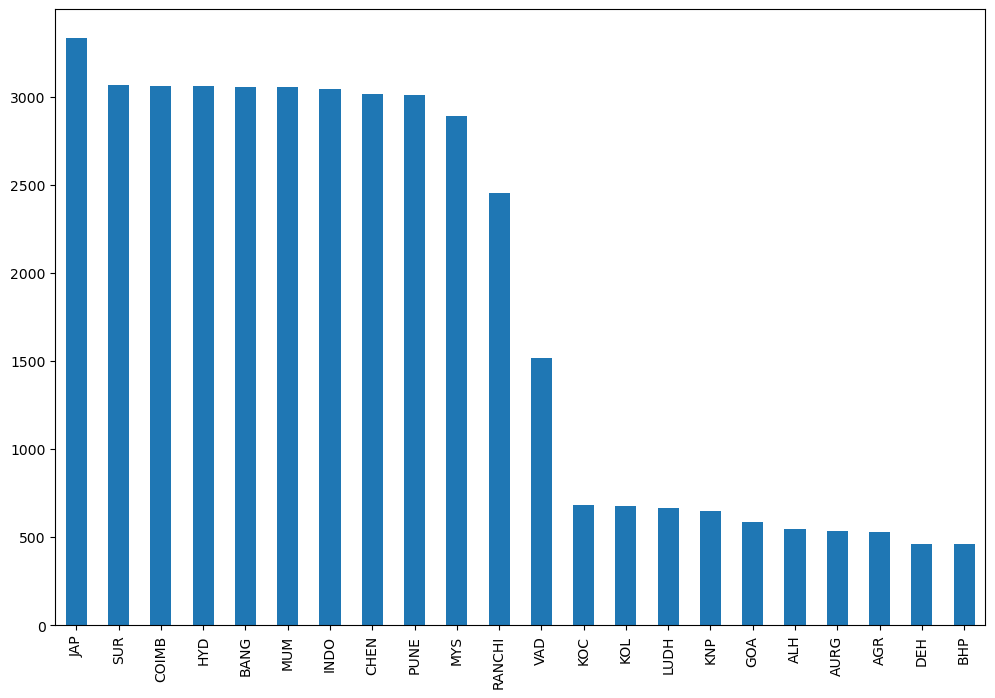

In [69]:
plt.figure(figsize=(12, 8))
df['Delivery_city'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()

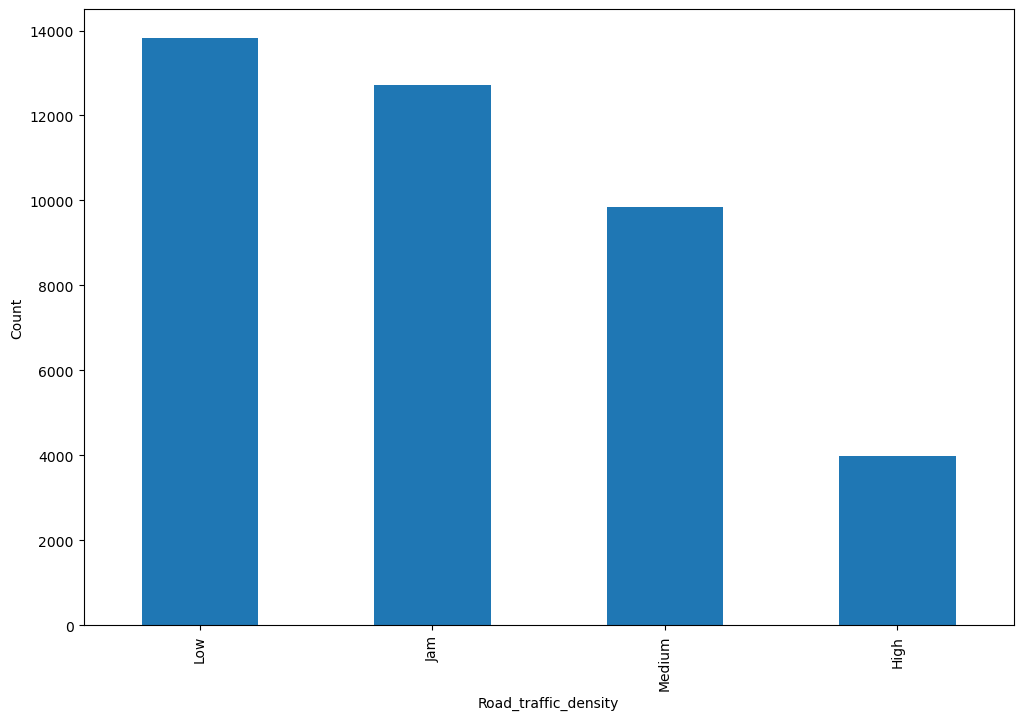

In [70]:
plt.figure(figsize=(12, 8))
df['Road_traffic_density'].value_counts().plot(kind='bar')
plt.xlabel('Road_traffic_density')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

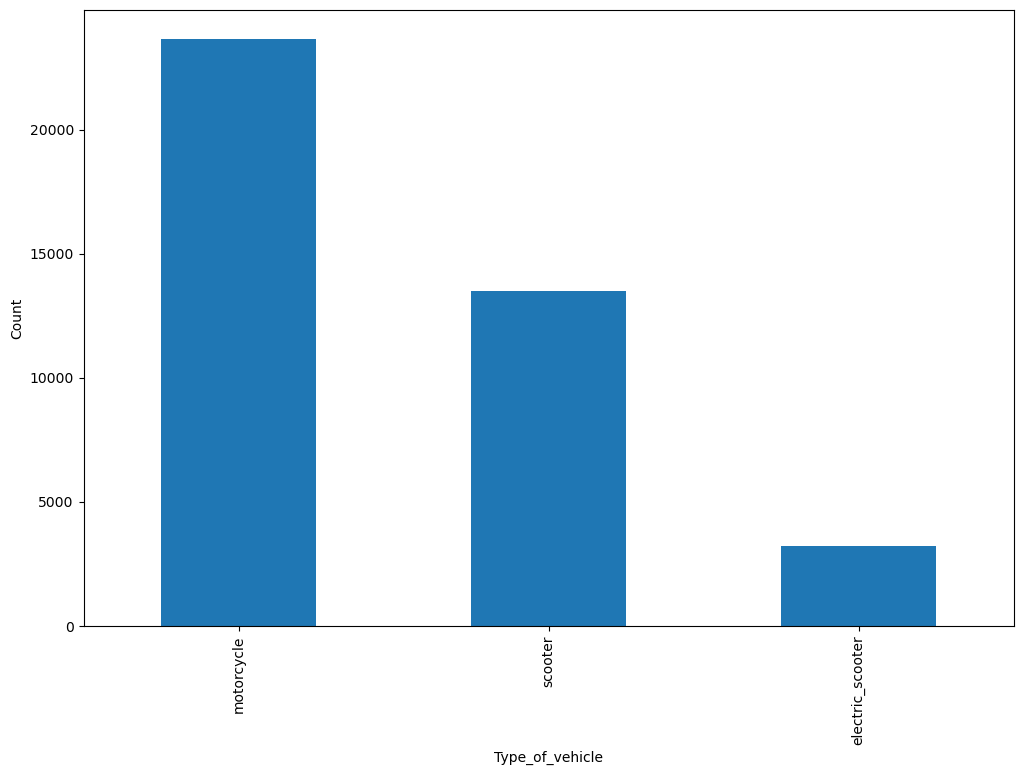

In [71]:
plt.figure(figsize=(12, 8))
df['Type_of_vehicle'].value_counts().plot(kind='bar')
plt.xlabel('Type_of_vehicle')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

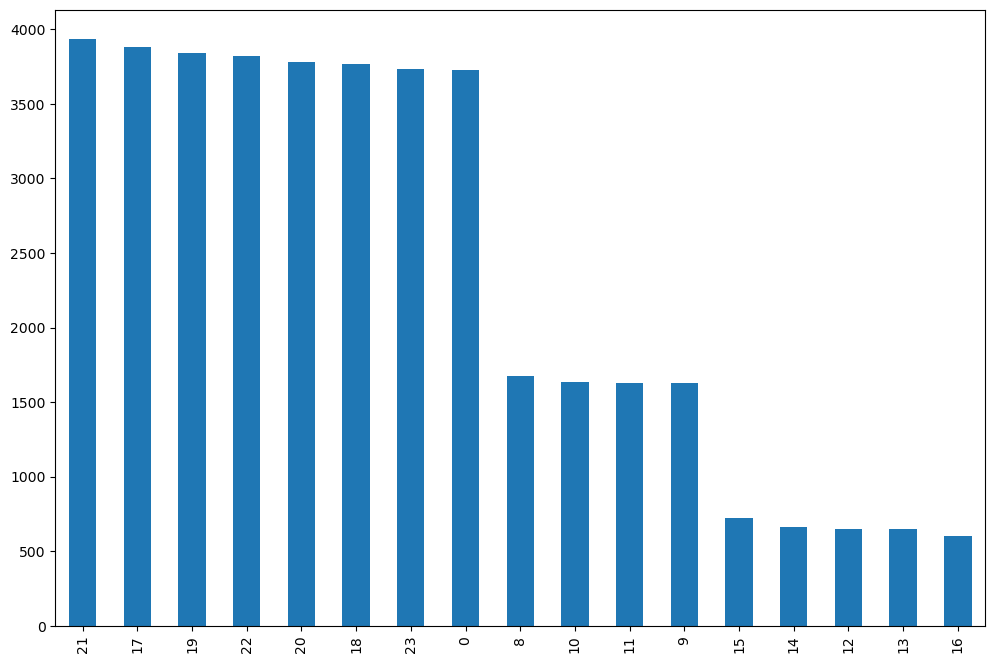

In [72]:
plt.figure(figsize=(12, 8))
df['TimeOrder_Hour'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()

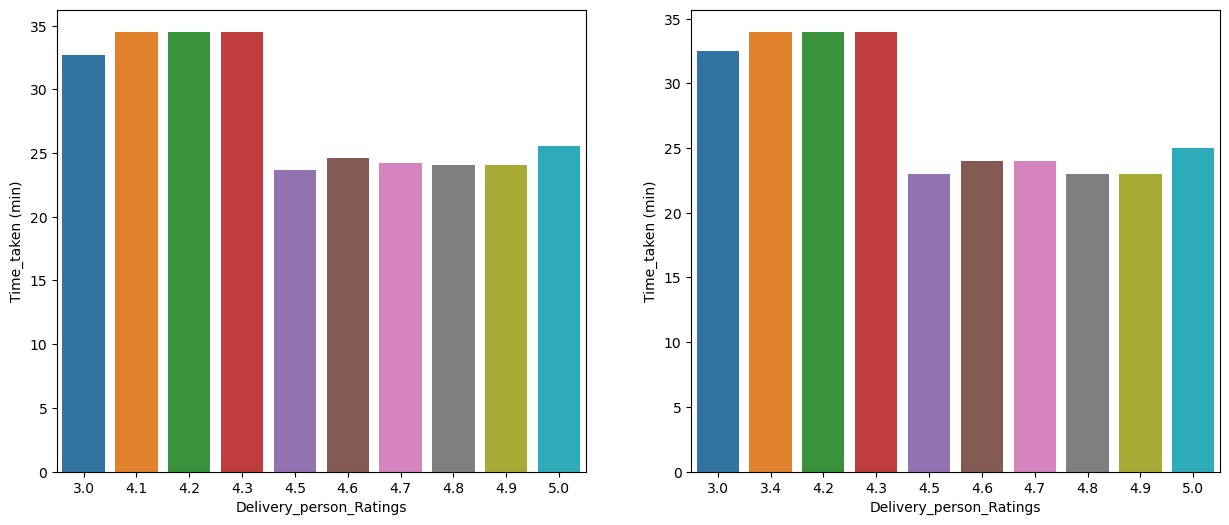

In [79]:
data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings']).median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [82]:
## DROPPING 'DELIVERY PERSON ID', 'TIME ORDERED' AND 'TIME ORDER PICKED'

In [81]:
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [83]:
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [84]:
df.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,46,2022,12,2,21,55,22,10,DEH,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,21,2022,4,3,17,30,17,40,PUNE,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,41,2022,2,14,19,50,20,5,KNP,19.396618
5,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,...,20,2022,2,4,20,25,20,35,MUM,13.763977
6,35.0,4.0,12.311072,76.654878,12.351072,76.694878,Windy,High,1,Meal,...,33,2022,1,3,14,55,15,10,MYS,6.218001
7,33.0,4.2,18.592718,73.773572,18.702718,73.883572,Sandstorms,Jam,2,Snack,...,40,2022,3,16,20,30,20,40,PUNE,16.849940
8,34.0,4.9,17.426228,78.407495,17.496228,78.477495,Cloudy,Jam,0,Snack,...,41,2022,3,20,20,40,20,50,HYD,10.757109
9,21.0,4.7,22.552672,88.352885,22.582672,88.382885,Windy,Jam,0,Meal,...,15,2022,2,15,21,15,21,30,KOL,4.540574


In [85]:
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int64
month                            int64
day                              int64
TimeOrder_Hour                   int32
TimeOrder_min                    int32
Time_Order_picked_Hour           int32
Time_Order_picked_min            int32
Delivery_city                   object
distance                       float64
dtype: object

In [87]:
## SEPERATING THE COLUMNS INTO NUMERICAL AND CATEGORICAL TYPES

In [86]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']
cat_col=[feature for feature in df.columns if df[feature].dtypes == 'O']

In [88]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [89]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

In [90]:
## DROPPING THE REST OF THE COLUMNS WHICH ARE OF NO USE FOR THE MODEL

In [91]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min'],axis=1,inplace=True)

In [92]:
df.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618
5,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,MUM,13.763977
6,35.0,4.0,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33,14,MYS,6.218001
7,33.0,4.2,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40,20,PUNE,16.849940
8,34.0,4.9,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41,20,HYD,10.757109
9,21.0,4.7,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15,21,KOL,4.540574


In [93]:
## SPLITTING THE DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES

In [94]:
X = df.drop(labels=['Time_taken (min)'],axis=1)
y = df[['Time_taken (min)']]

In [95]:
df[cat_col].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [97]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']

In [98]:
df[num_col].head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),TimeOrder_Hour,distance
0,36.0,4.2,2,3.0,46,21,10.280582
1,21.0,4.7,1,1.0,23,14,6.242319
2,23.0,4.7,1,1.0,21,17,13.787860
3,34.0,4.3,0,0.0,20,9,2.930258
4,24.0,4.7,1,1.0,41,19,19.396618


In [99]:
## APPLYING THE PROCESS OF ENCODING

In [100]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [102]:
## SPLITING THE COLUMNS INTO CATEGORICAL, ORDINAL AND NUMERICAL COLUMNS

In [101]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

In [103]:
## DIFFERENCE BTW CATEGORICAL AND ORDINAL COLUMNS IS THE THE ORDINAL COLUMNS CAN BE ASSIGNED WITH NUMERICAL VALUES

In [104]:
## USING THE PIPELINE METHOD TO FILL THE MISSING VALUES, FEATURE SCALING AND ENCODING

In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])



categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])



ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [107]:
from sklearn.compose import ColumnTransformer

preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [110]:
## APPLYING RANDOM FOREST REGRESSION

In [114]:
from sklearn.ensemble import RandomForestRegressor
randomreg = RandomForestRegressor(n_estimators=200)
randomreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [115]:
y_test_array = np.array(y_test)

y_pred = randomreg.predict(X_test)
np.set_printoptions(precision=2)

result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), 1)

print(result)

[[30.62 29.  ]
 [31.83 31.  ]
 [48.9  53.  ]
 ...
 [19.86 16.  ]
 [33.56 32.  ]
 [22.92 17.  ]]


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3.1251177345395957
Mean Squared Error (MSE): 15.1992025312926
Root Mean Squared Error (RMSE): 3.8986154633783263
R-squared (R2) Score: 0.8242614996604527
